In [ ]:
!apt install tesseract-ocr -y
!pip install pytesseract opencv-python-headless numpy tensorflow keras

In [21]:
import cv2
import pytesseract
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional
import matplotlib.pyplot as plt
import os
import random

In [22]:
image = cv2.imread('/content/IAM-0000003255-109cf78d.jpg')

In [23]:
# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [24]:
# Apply Thresholding for better OCR
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [25]:
# Run OCR to extract text
extracted_text = pytesseract.image_to_string(thresh)


In [26]:
# Print Extracted Text
print("\n🔍 Extracted Text from Handwritten Image:\n")
print(extracted_text)


🔍 Extracted Text from Handwritten Image:

      

 

 

Fe ea ae eae
ee ee er eee
ee ee Te

De a a eh ee

ee ae ee

ee ee ee
ee aa eee aera

Ce ee

awn ed



In [27]:
#Prepare the Text Data for Training
text = extracted_text.lower()  # Convert to lowercase
text = "".join([c for c in text if c.isalnum() or c.isspace()])  # Remove special characters
print("\n Cleaned Text Data:\n", text)


 Cleaned Text Data:
       

 

 

fe ea ae eae
ee ee er eee
ee ee te

de a a eh ee

ee ae ee

ee ee ee
ee aa eee aera

ce ee

awn ed



In [28]:
#Create Character Mapping for Encoding
chars = sorted(set(text))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

In [29]:
#convert text into sequence
sequence_length = 40
sequences = []
next_chars = []

for i in range(len(text) - sequence_length):
    sequences.append(text[i : i + sequence_length])
    next_chars.append(text[i + sequence_length])

In [30]:
# Convert to numerical format
X = [[char_to_idx[char] for char in seq] for seq in sequences]
y = [char_to_idx[char] for char in next_chars]


In [31]:
 #Convert to NumPy Arrays
X = pad_sequences(X, maxlen=sequence_length, padding='pre')
y = to_categorical(y, num_classes=len(chars))

X = np.array(X)
y = np.array(y)

In [32]:
#Build the LSTM Model for Character-Level Text Generation
model = Sequential([
    Embedding(len(chars), 50, input_length=sequence_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    LSTM(128),
    Dense(128, activation='relu'),
    Dense(len(chars), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Build the LSTM Model for Character-Level Text Generation
model = Sequential([
    Embedding(len(chars), 50, input_length=sequence_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    LSTM(128),
    Dense(128, activation='relu'),
    Dense(len(chars), activation='softmax')  # Correct output shape
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fix `y` shape issue
y = np.array(y).reshape(-1, len(chars))  # Reshape target correctly

# Train the Model
history = model.fit(X, y, epochs=50, batch_size=64)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.1588 - loss: 2.5596
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.4005 - loss: 2.4971
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4109 - loss: 2.3152
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4161 - loss: 1.9455
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.3953 - loss: 1.8761
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.4213 - loss: 1.7613
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.4005 - loss: 1.7614
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.4109 - loss: 1.7828
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.4265 - loss: 1.7363
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.4265 - loss: 1.7496
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.4057 - loss: 1.7861
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.4213 - l

In [36]:
#Generate Handwritten-Like Text
def generate_text(seed_text, length=200):
    generated = seed_text.lower()

    for _ in range(length):
        # Convert to numerical format
        encoded = [char_to_idx.get(char, 0) for char in generated[-sequence_length:]]
        encoded = pad_sequences([encoded], maxlen=sequence_length, padding='pre')

        # Predict next character
        pred = model.predict(encoded, verbose=0)
        next_index = np.argmax(pred)
        next_char = idx_to_char[next_index]

        # Append next character
        generated += next_char

    return generated

In [37]:
#Generate and Print Sample Handwritten Text
seed_text = "the quick brown fox jumps"
generated_text = generate_text(seed_text, length=200)
print("\n✍️ Generated Handwritten-Style Text:\n")
print(generated_text)


✍️ Generated Handwritten-Style Text:

the quick brown fox jumps eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee


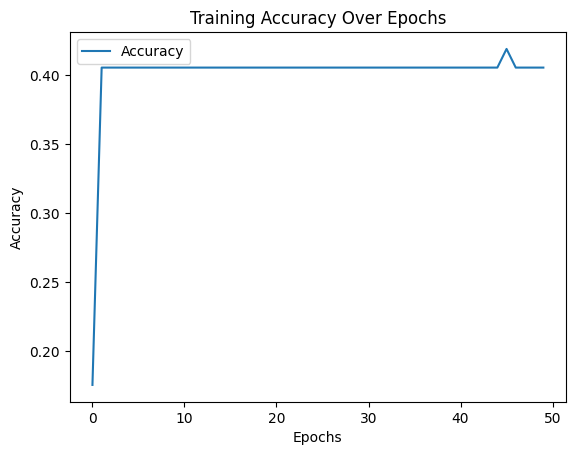

In [38]:
#Plot Training Accuracy
plt.plot(history.history['accuracy'], label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Accuracy Over Epochs")
plt.show()